# Environment Field

## Importing the dataset from the web page using API

In [2]:
import requests

url = "https://datasource.kapsarc.org/api/explore/v2.1/catalog/datasets/environment-database-2011/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true&apikey=322d3b8b19bd92c09abe2634f59fd92c1b5dbb3125232658fd1162f6"
response = requests.get(url)

if response.status_code == 200:
    with open("environment_database.csv", "wb") as file:
        file.write(response.content)
    print("Download completed successfully.")
else:
    print(f"Failed to download the dataset. Status code: {response.status_code}")


Download completed successfully.


In [3]:
# importing the required libraries and reading the data
import pandas as pd

data = pd.read_csv("environment_database.csv", sep=';')

In [4]:
# Slicing the data to get the data of required countries

countries = ['Afghanistan', 'Armenia', 'Australia', 'Bangladesh', 'Barbados',
             'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Cyprus',
             'Czechia', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France',
             'Germany', 'Greenland']

data = data[data['location_name'].isin(countries)]

In [5]:
# displaying the data
data.head(10)

,date,location_name,category,variable_name,value,variable_unit
18,2009.0,Germany,Air and Climate,GHG from Waste,16.320830,mio. tonnes of CO2 equivalent
32,2007.0,Brazil,Energy and Minerals,"Energy Use Intensity per $1,000 (PPP) GDP",97.000000,kg. oil equivalent
33,1994.0,Germany,NaN,Land under Permanent Meadows and Pastures,52710.000000,km2
34,2005.0,Colombia,Inland Water Resources,Total population supplied by water supply indu...,91.169998,%
41,1997.0,Armenia,Inland Water Resources,Precipitation,18595.000000,mio m3
46,2017.0,Bulgaria,Inland Water Resources,Actual evapotranspiration,70207.000000,mio m3
69,2019.0,France,Inland Water Resources,Actual evapotranspiration,299236.970000,mio m3
73,NaN,Bulgaria,NaN,NaN,NaN,NaN
95,2018.0,Estonia,Inland Water Resources,Fresh groundwater abstracted,213.570000,mio m3
103,2019.0,Armenia,Inland Water Resources,Fresh groundwater abstracted,1294.300049,mio m3


In [6]:
# sorting the data by year
data = data.sort_values(by = "date",ascending=False)

In [7]:
# using simple imputer from scikit-learn to handle the missing values

from sklearn.impute import SimpleImputer

categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = data.select_dtypes(include=["number"]).columns.tolist()

# Replacing the null values in numerical columns with mean
imputer_numerical = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_numerical.fit_transform(data[numerical_cols])

# Replacing the null values in categorical columns with most-frequent item in the feature
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

# Data Visualization

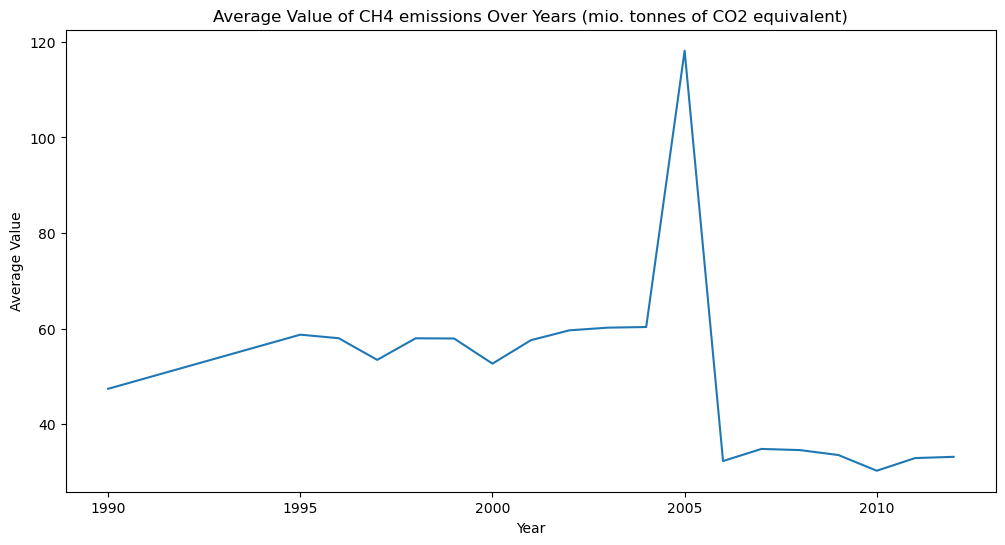

In [8]:
import matplotlib.pyplot as plt

data_CH4 = data[data["variable_name"]=="CH4 emissions"]

plt.figure(figsize=(12, 6))
data_CH4.groupby('date')['value'].mean().plot()
plt.title('Average Value of CH4 emissions Over Years (mio. tonnes of CO2 equivalent)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.savefig("CH4 Emissions.png",dpi=72)
plt.show()

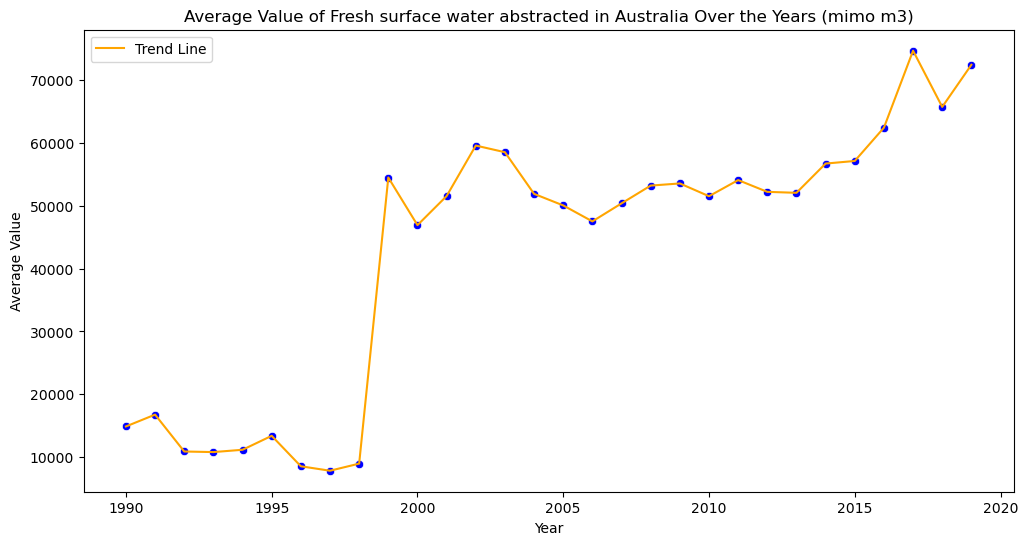

In [9]:
import seaborn as sns

data_aus = data[data["location_name"]=="Australia"]
data_freshwater = data[data["variable_name"]=="Fresh surface water abstracted"]
plt.figure(figsize=(12, 6))
data_freshwater =data_freshwater.groupby('date')['value'].mean().reset_index()
sns.scatterplot(data= data_freshwater,x="date",y="value",color='blue')
sns.lineplot(data=data_freshwater, x='date', y='value', color='orange', label='Trend Line')
plt.title('Average Value of Fresh surface water abstracted in Australia Over the Years (mimo m3)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.savefig(" Fresh surface water abstracted in Australia.png",dpi=72)
plt.show()

In [10]:
# Dropping the units column 
data = data.drop(data.columns[-1],axis=1)

In [11]:
DATA = data.copy()

In [12]:
# Encoding the categorical features

from sklearn.preprocessing import LabelEncoder
Le_location = LabelEncoder()
Le_category = LabelEncoder()
Le_variable = LabelEncoder()

data['location_name'] = Le_location.fit_transform(data['location_name'])
data['category'] = Le_category.fit_transform(data['category'])
data['variable_name'] = Le_variable.fit_transform(data['variable_name'])


In [13]:
# Applying the standardization to the numerical features such that all the features will be on same scale which is required for the model to perform analysis effectively
from sklearn.preprocessing import StandardScaler

standardscaler_year = StandardScaler()
standardscaler_value = StandardScaler()

data[['value']] = standardscaler_value.fit_transform(data[['value']])
data[['date']] = standardscaler_year.fit_transform(data[['date']])


In [14]:
data= data.rename(columns = {"date":"Year"})

In [15]:
# Identifying the outliers using IQR and removing them

Q1 = data['value'].quantile(0.25)
Q3 = data['value'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data = data[(data['value'] >= (Q1 - 1.5 * IQR)) & (data['value'] <= (Q3 + 1.5 * IQR))]


In [16]:
data= data.rename(columns={"variable_name":"Inidcators","location_name":"Country","category":"Categories","value":"Value"})

In [17]:
# Visualizing the data after preprocessing
data

,Year,Country,Categories,Inidcators,Value
141647,2.013949,14,3,93,-0.141347
84496,2.013949,2,3,60,-0.140405
84593,2.013949,10,3,84,-0.141174
112882,2.013949,12,3,20,-0.140887
112881,2.013949,11,3,20,-0.140567
...,...,...,...,...,...
7341,-3.210874,1,1,11,-0.141392
29449,-3.210874,15,1,11,-0.141392
49773,-3.210874,10,1,11,-0.141392
43953,-3.210874,13,1,11,-0.141384


In [18]:
# Training the Bagging Regressor Model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


X = data.iloc[:,:-1].values
Y = data.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=120, random_state=42)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

r2 = r2_score(Y_test, y_pred)

print("R2 Score of the model is:",r2)

R2 Score of the model is: 0.8730422179457031


## Prediction of Greenhouse Gas Emissions from Waste (GHG from Waste) in 2025 in different Countries


In [19]:
import numpy as np

# Fetching the respective feature encoded values
variable_encoded_value = Le_variable.transform(['GHG from Waste'])[0]
category_encoded_value = Le_category.transform(['Air and Climate'])[0]
data_GHG = data[data['Inidcators'] == variable_encoded_value].dropna(subset=['Value'])

countries = data_GHG['Country'].unique()

predictions_data = []

# Prediction for each country
for country in countries:
    country_data = data_GHG[data_GHG['Country'] == country]
    # Standardizing the year 
    year_reshaped = pd.DataFrame([[2030]], columns=['date'])
    standardized_year = standardscaler_year.transform(year_reshaped)
    #predicting the results
    future_predictions = model.predict([[standardized_year.flatten()[0], country, category_encoded_value, variable_encoded_value]])
    future_predictions_reshaped = future_predictions.reshape(-1, 1)
    future_predictions = standardscaler_value.inverse_transform(future_predictions_reshaped)
    
    #appending the predicted data to the list
    predictions_data.append({
            'Country':Le_location.inverse_transform([country])[0],
            'Year': 2030,
            'GHG from Waste': future_predictions[0][0]
    })

# Converting the list to the data frame
predictions = pd.DataFrame(predictions_data)
predictions




,Country,Year,GHG from Waste
0,Germany,2030,13.945458
1,Australia,2030,13.138029
2,Estonia,2030,1.412598
3,Finland,2030,3.262639
4,Czechia,2030,4.442114
5,France,2030,12.413738
6,Denmark,2030,1.676035
7,Cyprus,2030,3.943906
8,Canada,2030,18.729992
9,Bulgaria,2030,4.429216


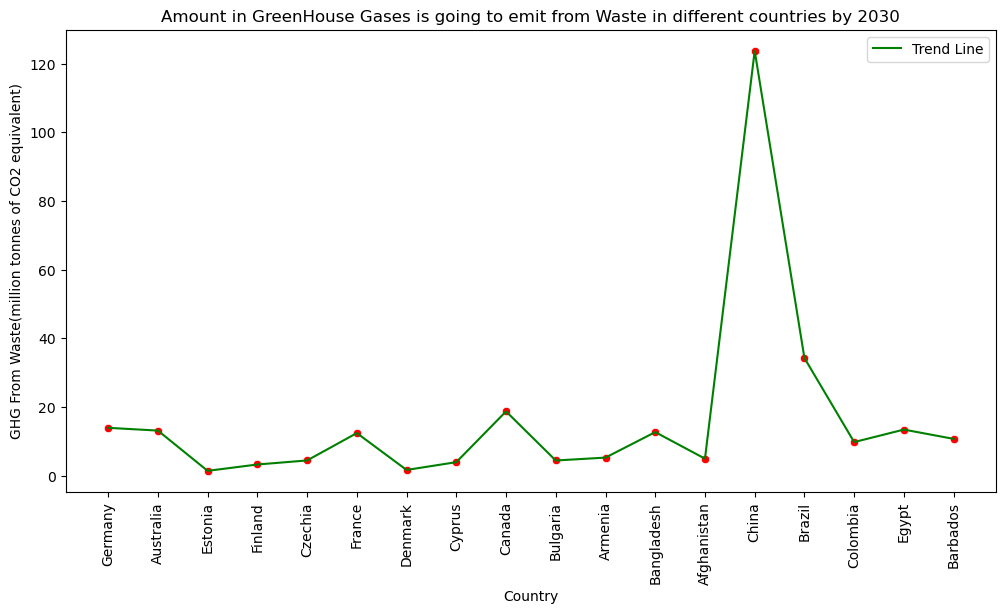

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.scatterplot(data= predictions,x="Country",y="GHG from Waste",color='red')
sns.lineplot(data=predictions, x='Country', y='GHG from Waste', color='green', label='Trend Line')
plt.title('Amount in GreenHouse Gases is going to emit from Waste in different countries by 2030')
plt.xlabel('Country')
plt.ylabel('GHG From Waste(million tonnes of CO2 equivalent)')
plt.xticks(rotation=90)
plt.savefig("GHG From Waste(mio tonnes of CO2 equivalent)",dpi=72,bbox_inches='tight')
plt.show()